# kmeans clustering


In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

## Reading the dataset


In [2]:
import pandas as pd
df=pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.columns=['CustomerID', 'Gender', 'Age', 'Income', 'Spending']
df.head()

,CustomerID,Gender,Age,Income,Spending
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Classify Similar Customers togethor based on Income and Spending


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt


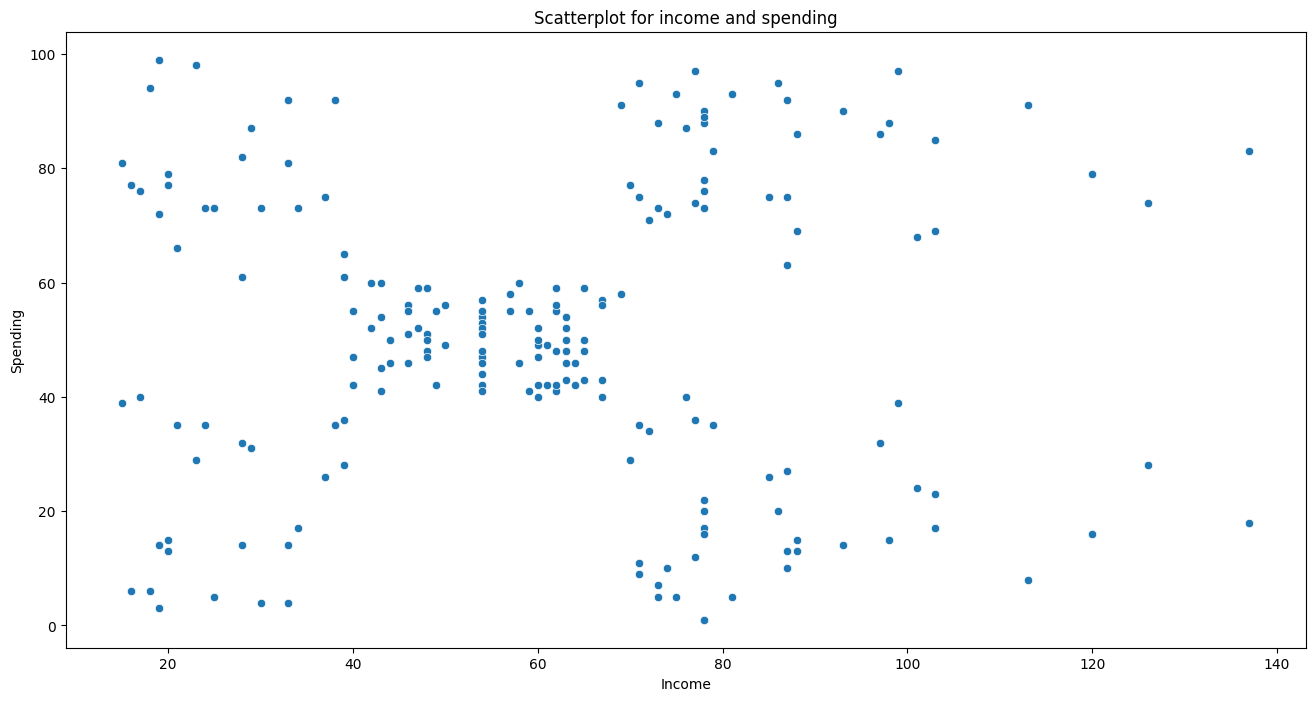

In [6]:
plt.figure(figsize=(16,8))
sns.scatterplot(data=df,x='Income',y='Spending')
plt.title('Scatterplot for income and spending')
plt.show()

In [7]:
X=df[['Income','Spending']]
X

,Income,Spending
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


## create sklearn pipeline for X

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


In [9]:
num_pipe=Pipeline(steps=[('impute',SimpleImputer(strategy='median')),
                         ('scaler',StandardScaler())])

In [10]:
X_pre=num_pipe.fit_transform(X)
X_pre[0:5]

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992]])

In [11]:
cols=num_pipe.get_feature_names_out()
cols

array(['Income', 'Spending'], dtype=object)

In [12]:
X_pre=pd.DataFrame(X_pre,columns=cols)
X_pre.head()

,Income,Spending
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


## Get the yellowbricks package for elbow visualization


In [13]:
%pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: yellowbrick in c:\data_science_class\repository\venv\lib\site-packages (1.5)




[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Restart and run all cells

In [14]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import kelbow_visualizer


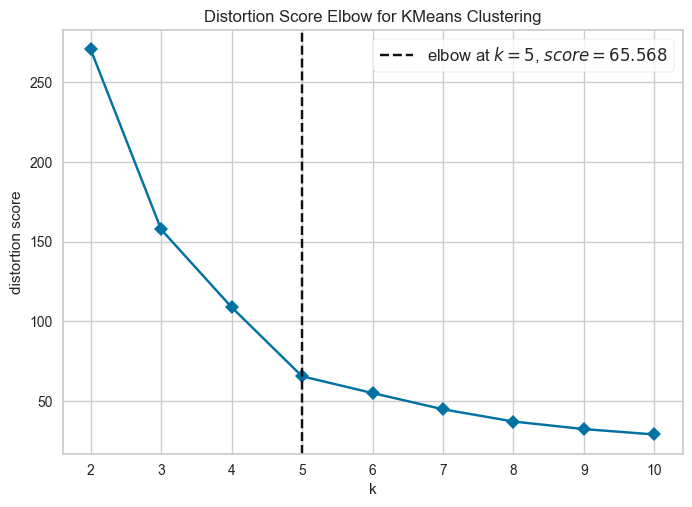

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=10), timings=False)

In [15]:
kelbow_visualizer(KMeans(),
                  X_pre,
                  K=(2,15),
                  timings=False)

# Kmeans final model


In [16]:
model1=KMeans(n_clusters=5)
model1.fit(X_pre)

KMeans(n_clusters=5)

In [17]:
lb=model1.labels_
lb

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 1,
       0, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 1, 2, 3, 2, 3, 2,
       1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2])

In [18]:
X['Label']=lb

In [19]:
X

,Income,Spending,Label
0,15,39,0
1,15,81,4
2,16,6,0
3,16,77,4
4,17,40,0
...,...,...,...
195,120,79,2
196,126,28,3
197,126,74,2
198,137,18,3


In [20]:
X[X['Label']==0]

,Income,Spending,Label
0,15,39,0
2,16,6,0
4,17,40,0
6,18,6,0
8,19,3,0
10,19,14,0
12,20,15,0
14,20,13,0
16,21,35,0
18,23,29,0


# Centroids

In [21]:
C=X.groupby(by='Label').mean()
C

,Income,Spending
Label,,
0,26.304348,20.913043
1,55.296296,49.518519
2,86.538462,82.128205
3,88.200000,17.114286
4,25.727273,79.363636


## Visualize cluster with seaborn


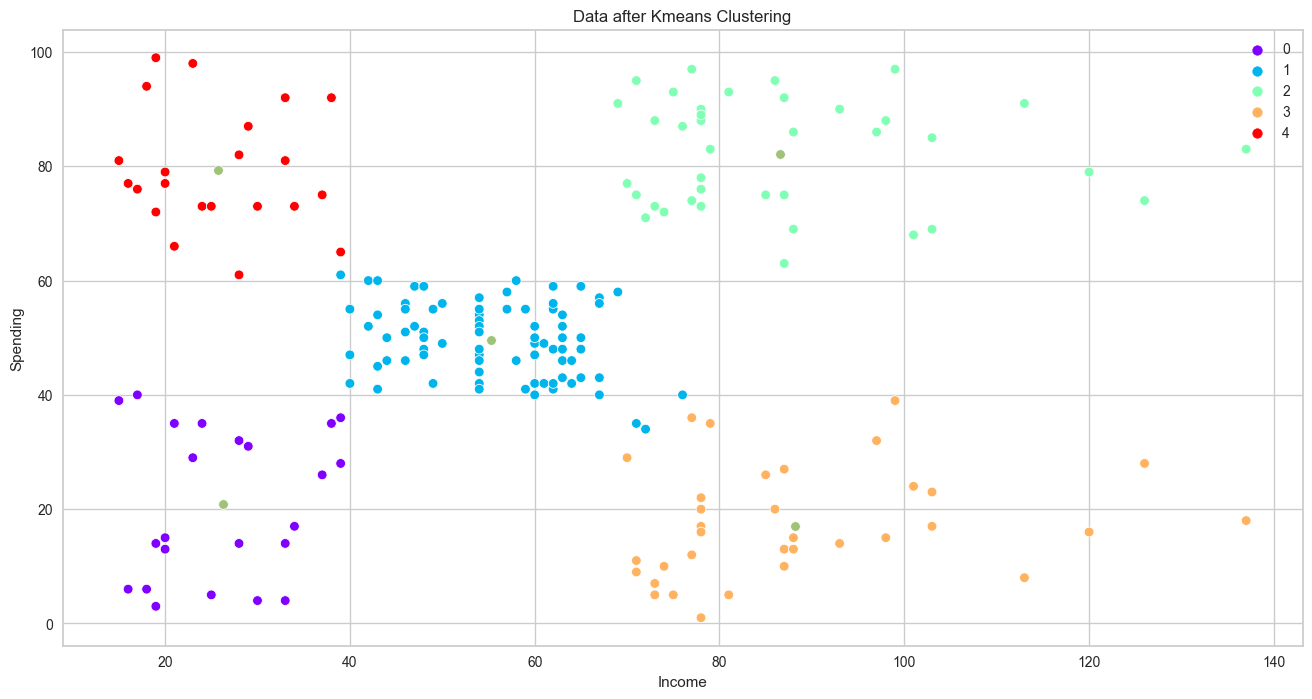

In [22]:
plt.figure(figsize=(16,8))
sns.scatterplot(data=X,x='Income',y='Spending',hue='Label',palette='rainbow')
sns.scatterplot(data=C,x='Income',y='Spending')
plt.title('Data after Kmeans Clustering')
plt.show()

## Classify similar customers on basis of Age, Income, Spending


In [23]:
X2=df[['Age','Income','Spending']]
X2

,Age,Income,Spending
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


# Preprocessing for X2


In [24]:
num_pipe2=Pipeline(steps=[('impute',SimpleImputer(strategy='median')),
                          ('scaler',StandardScaler())])

In [25]:
X_pre2=num_pipe2.fit_transform(X2)
X_pre2[0:5]

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992]])

In [26]:
cols2=num_pipe2.get_feature_names_out()
cols2

array(['Age', 'Income', 'Spending'], dtype=object)

In [27]:
X_pre2=pd.DataFrame(X_pre2,columns=cols2)
X_pre2.head()

,Age,Income,Spending
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


# Apply K-elbow visualizer


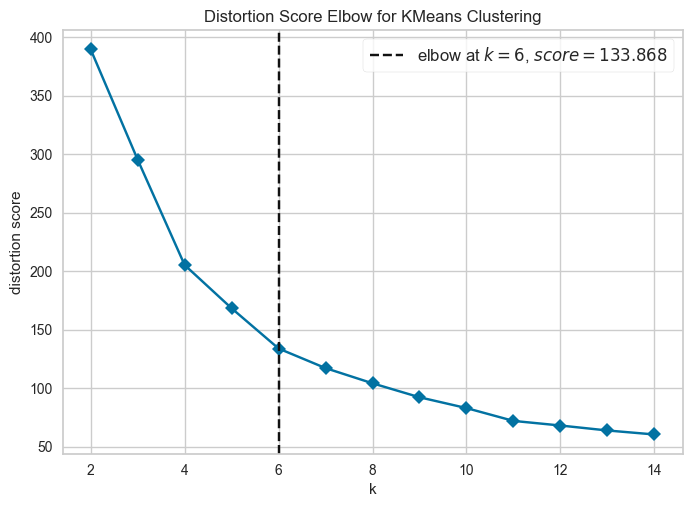

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=14), k=(2, 15), timings=False)

In [28]:
kelbow_visualizer(KMeans(),
                  X_pre2,
                  k=(2,15),
                  timings=False)

# Create final model


In [29]:
model2=KMeans(n_clusters=6)
model2.fit(X_pre2)


KMeans(n_clusters=6)

In [30]:
lb2=model2.labels_
lb2

array([0, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 4, 0, 3, 0,
       3, 0, 4, 5, 5, 5, 4, 5, 5, 4, 4, 4, 4, 4, 5, 4, 4, 5, 4, 4, 4, 5,
       4, 4, 5, 5, 4, 4, 4, 4, 4, 5, 4, 5, 5, 4, 4, 5, 4, 4, 5, 4, 4, 5,
       5, 4, 4, 5, 4, 5, 5, 5, 4, 5, 4, 5, 5, 4, 4, 5, 4, 5, 4, 4, 4, 4,
       4, 5, 5, 5, 5, 5, 4, 4, 4, 4, 5, 5, 5, 2, 5, 2, 1, 2, 1, 2, 1, 2,
       5, 2, 1, 2, 1, 2, 5, 2, 1, 2, 5, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 4, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [31]:
X2['Label']=lb2
X2

,Age,Income,Spending,Label
0,19,15,39,0
1,21,15,81,0
2,20,16,6,3
3,23,16,77,0
4,31,17,40,3
...,...,...,...,...
195,35,120,79,2
196,45,126,28,1
197,32,126,74,2
198,32,137,18,1


In [32]:
for i in range(6):
    print(f"Cluster number:{i}\n")
    display(X2[X2['Label']==i])
    print('\n================================\n')

Cluster number:0



,Age,Income,Spending,Label
0,19,15,39,0
1,21,15,81,0
3,23,16,77,0
5,22,17,76,0
7,23,18,94,0
9,30,19,72,0
11,35,19,99,0
13,24,20,77,0
15,22,20,79,0
17,20,21,66,0




Cluster number:1



,Age,Income,Spending,Label
126,43,71,35,1
128,59,71,11,1
130,47,71,9,1
134,20,73,5,1
136,44,73,7,1
140,57,75,5,1
144,25,77,12,1
146,48,77,36,1
148,34,78,22,1
150,43,78,17,1




Cluster number:2



,Age,Income,Spending,Label
123,39,69,91,2
125,31,70,77,2
127,40,71,95,2
129,38,71,75,2
131,39,71,75,2
133,31,72,71,2
135,29,73,88,2
137,32,73,73,2
139,35,74,72,2
141,32,75,93,2




Cluster number:3



,Age,Income,Spending,Label
2,20,16,6,3
4,31,17,40,3
6,35,18,6,3
8,64,19,3,3
10,67,19,14,3
12,58,20,15,3
14,37,20,13,3
16,35,21,35,3
18,52,23,29,3
20,35,24,35,3




Cluster number:4



,Age,Income,Spending,Label
40,65,38,35,4
46,50,40,55,4
50,49,42,52,4
53,59,43,60,4
54,50,43,45,4
55,47,43,41,4
56,51,44,50,4
57,69,44,46,4
59,53,46,46,4
60,70,46,56,4




Cluster number:5



,Age,Income,Spending,Label
47,27,40,47,5
48,29,40,42,5
49,31,40,42,5
51,33,42,60,5
52,31,43,54,5
58,27,46,51,5
61,19,46,55,5
65,18,48,59,5
68,19,48,59,5
69,32,48,47,5


## Make use of plotly for 3D graphs


In [33]:
%pip install plotly nbformat


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



  Obtaining dependency information for nbformat from https://files.pythonhosted.org/packages/f4/e7/ef30a90b70eba39e675689b9eaaa92530a71d7435ab8f9cae520814e0caf/nbformat-5.9.2-py3-none-any.whl.metadata
  Using cached nbformat-5.9.2-py3-none-any.whl.metadata (3.4 kB)
  Obtaining dependency information for jsonschema>=2.6 from https://files.pythonhosted.org/packages/ce/aa/d1bd0b5ec568a903cc3ebcb6b096ab65c1d971c8a01ca3bf3cf788c3c646/jsonschema-4.19.2-py3-none-any.whl.metadata
  Using cached jsonschema-4.19.2-py3-none-any.whl.metadata (7.9 kB)
  Obtaining dependency information for jsonschema-specifications>=2023.03.6 from https://files.pythonhosted.org/packages/1c/24/83349ac2189cc2435e84da3f69ba3c97314d3c0622628e55171c6798ed80/jsonschema_specifications-2023.7.1-py3-none-any.whl.metadata
  Using cached jsonschema_specifications-2023.7.1-py3-none-any.whl.metadata (2.8 kB)
Using cached nbformat-5.9.2-py3-none-any.whl (77 kB)
Using cached jsonschema-4.19.2-py3-none-any.whl (83 kB)
Using cache

In [34]:
C2=X2.groupby(by='Label').mean()
C2

,Age,Income,Spending
Label,,,
0,25.250000,25.833333,76.916667
1,41.939394,88.939394,16.969697
2,32.692308,86.538462,82.128205
3,45.523810,26.285714,19.380952
4,56.333333,54.266667,49.066667
5,26.684211,57.578947,47.789474


In [35]:
import plotly.express as px
px.scatter_3d(data_frame=X2,x='Age',y='Income',z='Spending',color='Label')